<a href="https://colab.research.google.com/github/Sridharpadhy/-RETAIL-SALES-PREDICTION---Predicting-sales-of-a-major-store-chain-Rossmann/blob/main/(_Sridhar_Indivisual%20)_ML_Regression_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    : " RETAIL SALES PREDICTION " - Predicting sales of a major store chain Rossmann



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member  -** Sridhar bhagaban padhy

# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

Data Description

Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores

Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Following are the 7 major steps of building Machine Learning Model :
- Collecting Data.
- Preparing the Data
( Exploratory Data Analysis, 
feature engineering.)
- Choosing a Model
- Training the Model.
- Evaluating the Model.
- Parameter Tuning.
- Making Predictions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics Analysing the dataset by using Exploratory Data Analysis using exponential moving averages analyse trends and seasonality in Rossmann dataset Analyse Regression using following prediction analysis. A) Linear Regression Analysis B)Elastic Regression (Lasso & Ridge Regression). C) Dession tree

# ***Let's Begin !***

## ***1. Collecting the  Data***

### Import Libraries

In [ ]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading our Two Datasets
df_rossmann = pd.read_csv('/content/drive/MyDrive/ML Regression  Capstone project/Copy of Rossmann Stores Data.csv')
df_store = pd.read_csv('/content/drive/MyDrive/ML Regression  Capstone project/Copy of store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df_rossmann

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
df_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
df_rossmann.shape

(1017209, 9)

### Dataset Information

In [ ]:
df_rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


As we can see that in our df_rossmann we have zero null values and in our df_store we have too many null values.

In [ ]:
#calculating totall null values in our store dataframe
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

we have 6 columns in which we have null values. so we have  to fll these null values.


In [ ]:
#Dropping the features with high percentages of missing values
df_store = df_store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

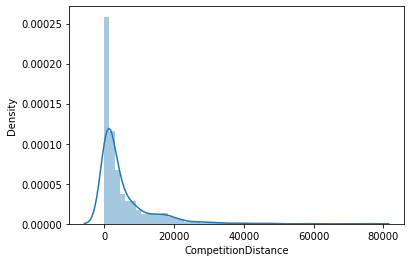

In [ ]:
# Before treat null values in competitiondistance column lets check its distribution.
sns.distplot(df_store['CompetitionDistance'] , hist=True)

So, as we can see the the graph is showing the distribution is heavy skewed we will apply the median to all the null values.

In [ ]:
#replacing Nan values in CompetitionDistance with median.
df_store['CompetitionDistance']=df_store['CompetitionDistance'].replace(np.nan,df_store['CompetitionDistance'].median())
df_store.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

### What did you know about your dataset?

As we got  two dataset Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores and it has 1017209 rows × 9 columns and 1115 × 10 columns respectively and rossmann datset has no null value while the store dataset has many null values so we drop some of them which had large no of null and replace the null with median and made the datset free of any null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
df_rossmann.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df_store.describe()

,Store,CompetitionDistance,Promo2
count,1115.00000,1115.000000,1115.000000
mean,558.00000,5396.614350,0.512108
std,322.01708,7654.513635,0.500078
min,1.00000,20.000000,0.000000
25%,279.50000,720.000000,0.000000
50%,558.00000,2325.000000,1.000000
75%,836.50000,6875.000000,1.000000
max,1115.00000,75860.000000,1.000000


As we are now made data null free we will merge both the dataset so that we can do data wrangling to it we will merge on the column store.

In [ ]:
merge_df = pd.merge(df_rossmann , df_store , on = 'Store'  , how = 'left')

In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 108.6+ MB


so , now we have a df which is merge of both dataframe and has 1017209 rows x 13 columns. 
And also as we can see that many columns are object datatype so we have to check and change the datatype of thses column because our machine learning algorithms only takes numberical values.


## 3. ***Data Wrangling***

In [ ]:
#Converting Different dtype into int 

As we can see one column is date column it is in the object datatype so first we will convert it into date tym and make separate colum for date , tym and month .


In [ ]:
type(merge_df['Date'])

pandas.core.series.Series

In [ ]:
# converting date in data time datatype:
merge_df['Date']=pd.to_datetime(merge_df['Date'])

In [ ]:
#makes seperate column for date , month and year
merge_df['Year'] =  merge_df['Date'].apply(lambda x : x.year)
merge_df['Month'] =  merge_df['Date'].apply(lambda x : x.month)
merge_df['Day'] =  merge_df['Date'].apply(lambda x : x.day)

In [ ]:
merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,2015,7,31


In [ ]:
print(merge_df['Date'].min(),'initial')
print(merge_df['Date'].max(),'final')

2013-01-01 00:00:00 initial
2015-07-31 00:00:00 final


It says that we have the dataset of between 3 years 

As we have change the date lets go into orther 3  datype change from object to int by split it by loc and then put (.astype())
AND this all are catogerical dtaset so converting it ibto numeric so we can use pd.get_dummies or make it into levels and loc them


In [ ]:
merge_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#now as we can see the 0 and '0' as two value so we are doing .loc and giving index as all the value having 0 give or equals to 0.
merge_df.loc[merge_df['StateHoliday'] == '0', 'StateHoliday'] = 0
merge_df.loc[merge_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
merge_df.loc[merge_df['StateHoliday'] == 'b', 'StateHoliday'] = 2
merge_df.loc[merge_df['StateHoliday'] == 'c', 'StateHoliday'] = 3
merge_df['StateHoliday']=merge_df['StateHoliday'].astype(int , copy = False)

In [ ]:
merge_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [ ]:
#now lets do same for assorments
merge_df.loc[merge_df['Assortment'] == 'a', 'Assortment'] = 0
merge_df.loc[merge_df['Assortment'] == 'b', 'Assortment'] = 1
merge_df.loc[merge_df['Assortment'] == 'c', 'Assortment'] = 2
merge_df['Assortment']=merge_df['Assortment'].astype(int , copy = False)

In [ ]:
#now for last data 
merge_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

store_type 0 means small store_type.

store_type 1 means medium store_type.

store_type 2 means large store_type.

store_type 3 means huge store_type.

In [ ]:
merge_df.loc[merge_df['StoreType'] == 'a', 'StoreType'] = 0
merge_df.loc[merge_df['StoreType'] == 'b', 'StoreType'] = 1
merge_df.loc[merge_df['StoreType'] == 'c', 'StoreType'] = 2
merge_df.loc[merge_df['StoreType'] == 'd', 'StoreType'] = 3
merge_df['StoreType']=merge_df['StoreType'].astype(int , copy = False)

In [ ]:
# At last the CompetitionDistance is in type float lets just convert it into int and then its ready to visualize.
merge_df['CompetitionDistance']=merge_df['CompetitionDistance'].astype(int , copy = False)

In [ ]:
#as we have changed and manipulated all the colums lets check it by info()
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  int64         
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  int64         
 10  Assortment           1017209 non-null  int64         
 11  CompetitionDistance  1017209 non-null  int64         
 12  Promo2               1017209 non-null  int64         
 1

So , we can see the datset is completely cleaned , manipulated and wrangled and ready to go for data visualization.

In [ ]:
#Just making an copy of this final df so that if any changes or inplace happens the main df doesnot get affected.
final_df = merge_df.copy()

In [ ]:
# Checking Duplicate Values
value=len(final_df[final_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


### What all manipulations have you done and insights you found?

As once all the null value is been taken care of we merged both the datset and see the info and get to known that many columns are of dataset of object which is not acceptable in visualization and also in machine learning so , we first change the date into date time type seperated the year , month and , day orther then that orther 4 column like assorments , store_type , stateholiday are been leveled in numeric value and coverted it into int and all of them are made into int and made ready to move forward task .

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,0,2015,7,31


### Chart - 1

Our main aim is sales so lets see the distribution of sales according to month.

[Text(0.5, 1.0, 'Sales according to Month')]

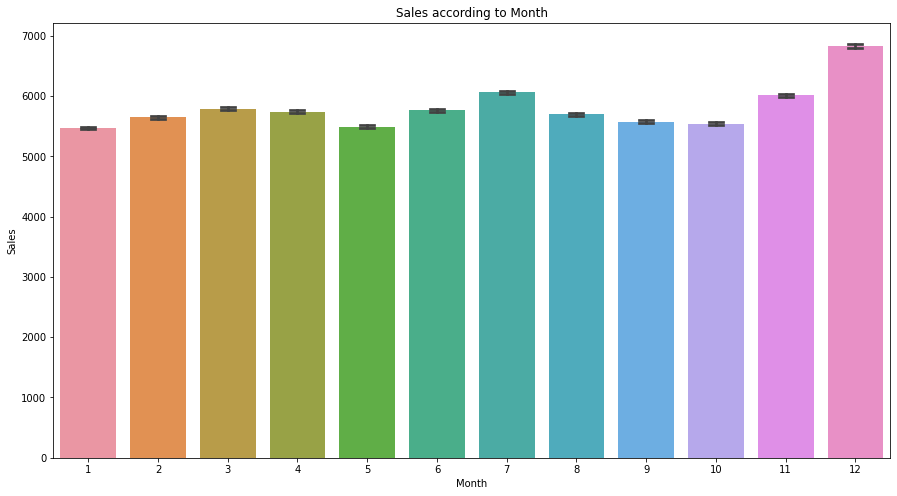

In [ ]:
# Chart - 1 : Sales According to Month
plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Month',y='Sales',capsize=.2 ).set(title = 'Sales according to Month')


##### 1. Why did you pick the specific chart?

As our main aim is sales we have to find out and see all the possible relation and outcome that effect sales.

##### 2. What is/are the insight(s) found from the chart?

In the above chart The sales in the month of December is high beacuse of winter holidays and Christmas festival and also new year so. Lots of stores start many offers on some products so people will more buy discounted items.

### Chart-2 

[Text(0.5, 1.0, 'Sales according to Year')]

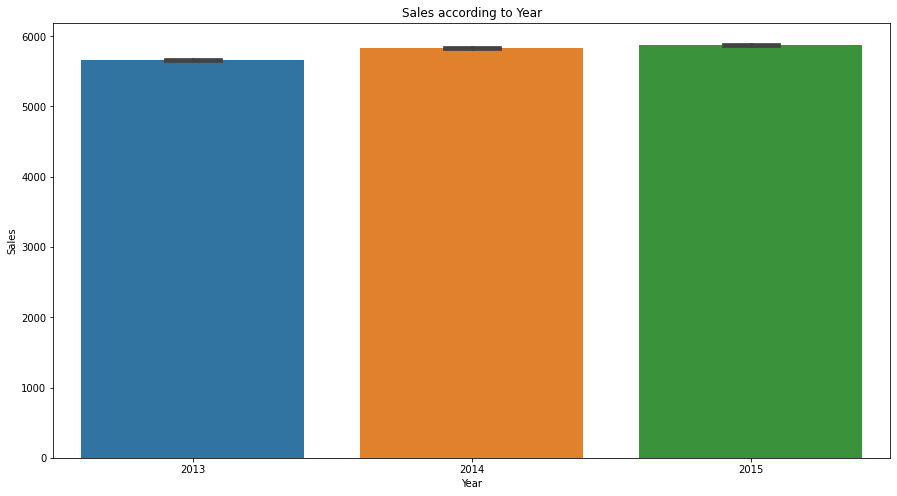

In [ ]:
# Chart - Sales According to year
plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Year',y='Sales',capsize=.2 ).set(title = 'Sales according to Year')

##### 1. What is/are the insight(s) found from the chart?

In this chart of sales according to years shows that there is no big difference between all 3 years but then too in 2014 and 2015 have almost same sales through out the year but in 2013 there is slightly low sales.

#### Chart - 3

[Text(0.5, 1.0, 'Sales according to Day of Week')]

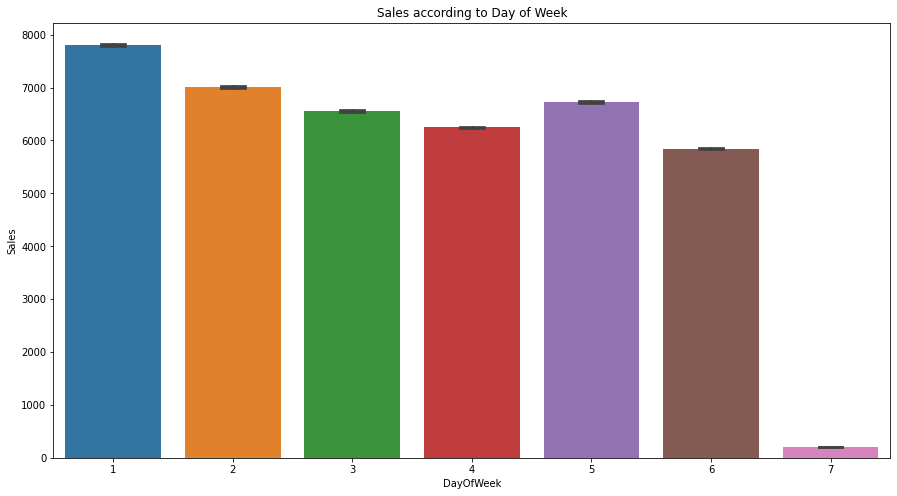

In [ ]:
# Chart - 3 Sales according to Day of week
plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='DayOfWeek',y='Sales',capsize=.2 ).set(title = 'Sales according to Day of Week')

##### 1. Why did you pick the specific chart?

Because we wanted to have a look on the sales happens around the different days of the week .

##### 2. What is/are the insight(s) found from the chart?

Plot between Sales and Daysof week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on saturday. It also shows that sales on Sunday is almost near to Zero as on sunday maximumstores are closed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes it helps in deciding when to open a store which tym of year , which day n how it can boost the business.

#### Chart - 4

[Text(0.5, 1.0, 'Promotion Effect on Sales')]

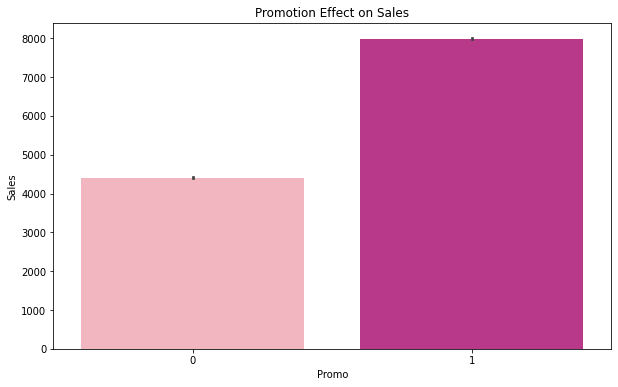

In [ ]:
# Chart - 4 Promotion Effect on Sales
plt.subplots(figsize = (10,6))
sns.barplot(x= 'Promo', y= 'Sales', data= final_df, palette= 'RdPu').set(title = 'Promotion Effect on Sales')

##### 1. Why did you pick the specific chart?

so , that we get to known the realtionship between the promo and sales does the promotion make differnce in sales .

##### 2. What is/are the insight(s) found from the chart?

 Here 0 represents the store which didn't opt for promotion and 1 represents for stores who opt for promotion. Those stores who took promotions their sales are high as compared to stores who didn't took promotion.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes , it suggest as that we should apply promotions which will boost our sales.

#### Chart - 5

[Text(0.5, 1.0, 'Sales according to Store Type')]

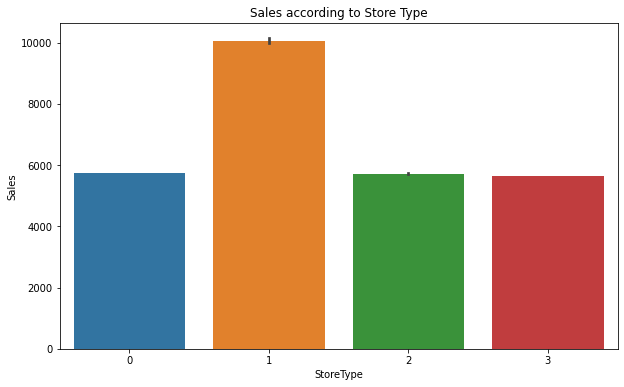

In [ ]:
# Chart - 5 Sales according to Store Type
plt.subplots(figsize = (10,6))
sns.barplot(x= 'StoreType', y= 'Sales', data= final_df, ).set(title = 'Sales according to Store Type')

##### 1. What is/are the insight(s) found from the chart?

In the above chart The sales in the store type 1 have higher sales as compare to other store catagory. the rest of store having almost same sales.

#### Chart - 6

[Text(0.5, 1.0, 'Sales according to Assortment')]

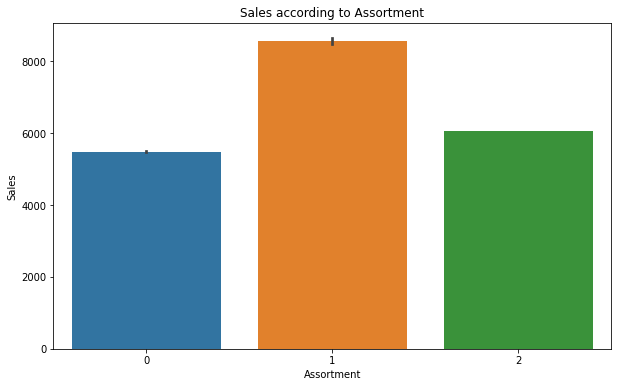

In [ ]:
# Chart - 6  Sales according to Assortment
plt.subplots(figsize = (10,6))
sns.barplot(x= 'Assortment', y= 'Sales', data= final_df, ).set(title = 'Sales according to Assortment')

##### 1. What is/are the insight(s) found from the chart?

In the above chart The sales in which product assortment type 1 have higher sales as compare to other assortment catagory. the rest of assortment having almost same sales.

#### Chart - 7

0 = Public Holiday, 1 = Easter Holiday, 2 = Chirstmas, 3 = None

[Text(0.5, 1.0, 'Sales according to StateHoliday')]

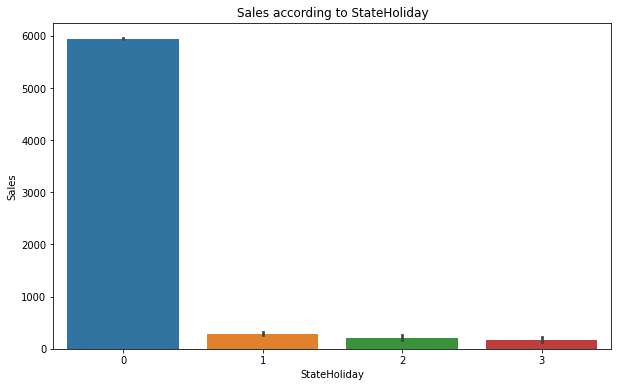

In [ ]:
# Chart - 7 Sales on school and state holiday
plt.subplots(figsize = (10,6))
sns.barplot(x= 'StateHoliday', y= 'Sales', data= final_df, ).set(title = 'Sales according to StateHoliday')


[Text(0.5, 1.0, 'Sales according to SchoolHoliday')]

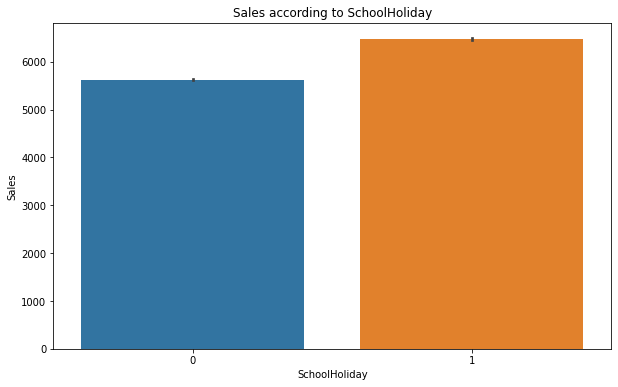

In [ ]:
plt.subplots(figsize = (10,6))
sns.barplot(x= 'SchoolHoliday', y= 'Sales', data= final_df, ).set(title = 'Sales according to SchoolHoliday')

##### 1. Why did you pick the specific chart?

so , that we get to known is there any relation between the holidays and sales .

##### 2. What is/are the insight(s) found from the chart?

We can observe that most of the stores remain closed during state and holidays. But it is interesting to note that the number of stores opened during School Holiday. Another important thing to note is that the stores which were opened during school holidays had more sales than normal.

## Conclusions From EDA:

Conclusions From EDA

There are 2 datasets - 1)Rossmann.csv & 2)store.csv

Shape of Rossmann dataset = (1017209,8) shape of store dataset = (1115,10)

On looking on datasets we find lots of NAN values in store dataset.

Try to replace NAN values with suitable values. In competitiondistance column only 3 NAN values are there. So we replaced it with median.

Now for rest of the columns (Competitionopensincemonth, Competitionopensinceyear, Promo2, Promointerval) there are lots of NAN values and the best way to drop them .

After combinning shape of final dataset (1017209 rows and 13 columns ).

Also there is some column such as 'stateholiday', 'Schoolholiday' & 'Assortments' which contains object values. so, try to change into int by giving suitable values.

We also did some graphs analysis and we got are:

- From plot sales and competition open since month shows sales go increasing from november and highest in month december. This may be due to Cristmas Eve and New Year.

- From plot sales and day of week, sales highest on monday and start declining from tuesday to saturday and on sunday sales almost near to 0. This because on sunday all stores be closed.

- plot between promotion and sales shows that promotion helps in increaseing sales. This similar trends also shows with customers.

- plot between state holidays and sales shows that during public holiday sales are actually high but for other holidays such as Ester and Christmas sales be very low. This is because Easter and Christmas stores also closed so sales goes down.

**`As we can see that our target variable 'Sales' look like normal distribution.`**

## Now lets check the distribution of orther features

In [ ]:
numeric_feat = list(final_df.describe().columns)
numeric_feat

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'Year',
 'Month',
 'Day']

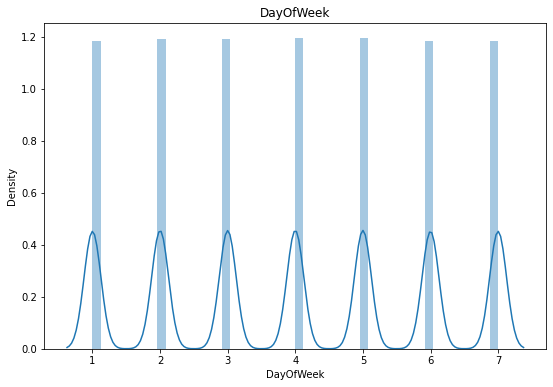

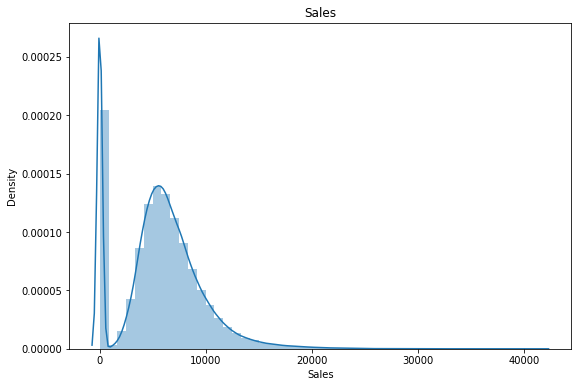

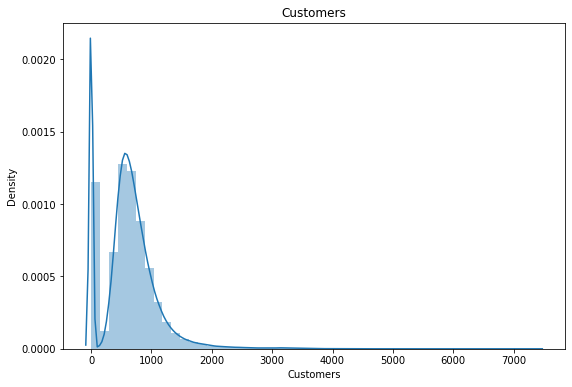

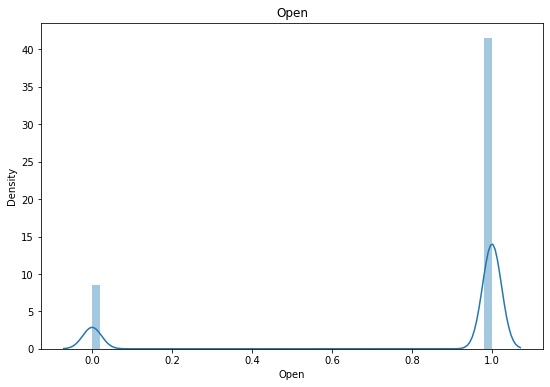

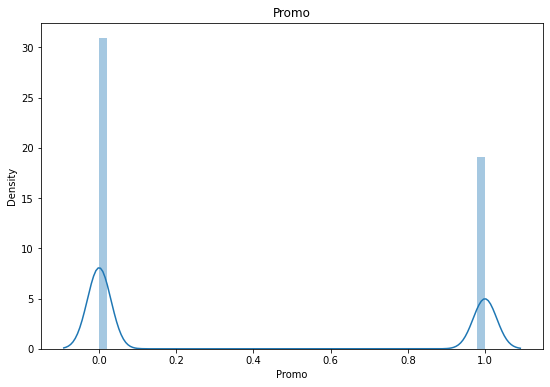

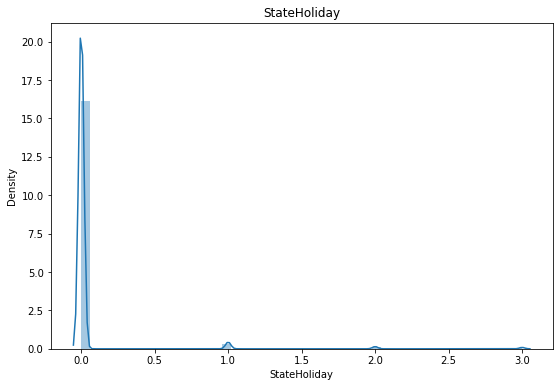

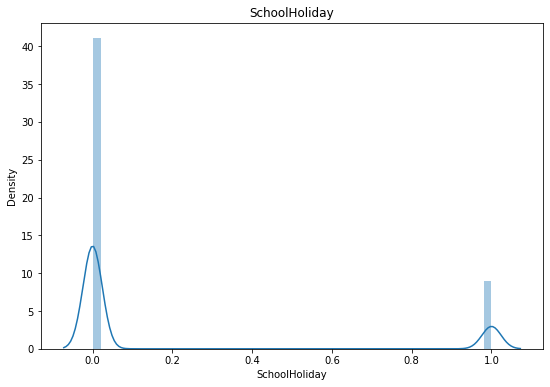

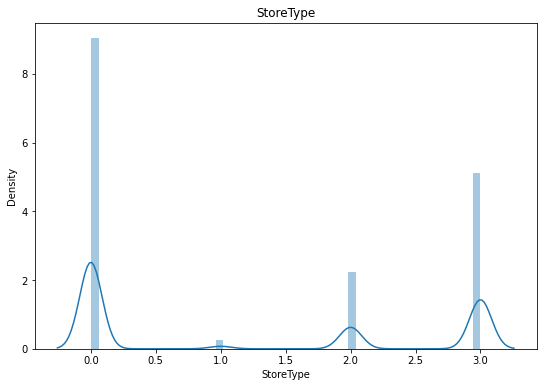

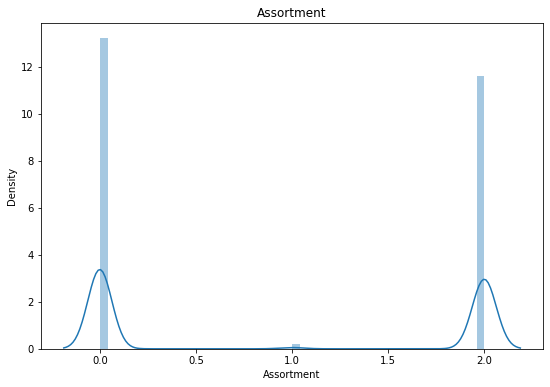

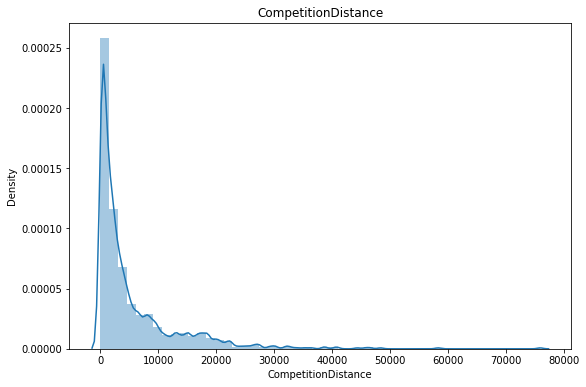

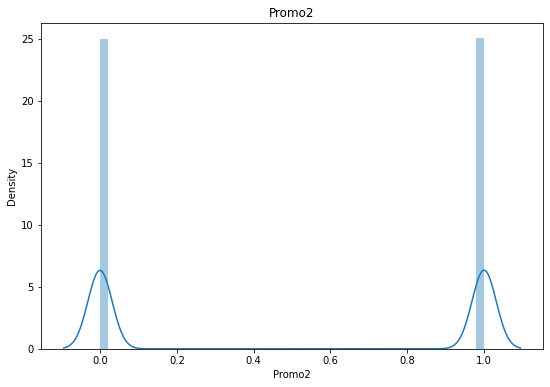

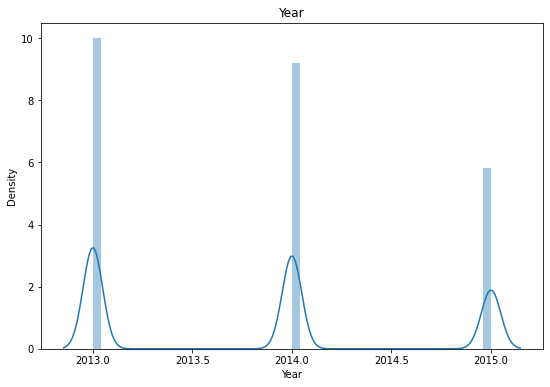

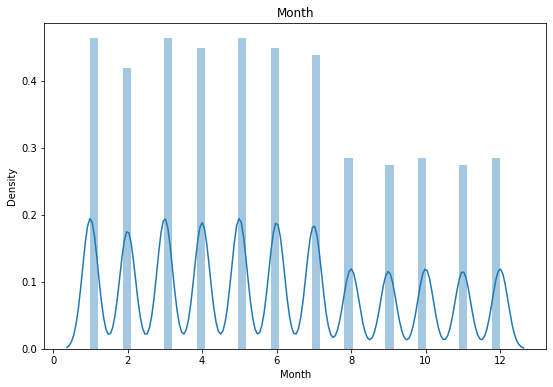

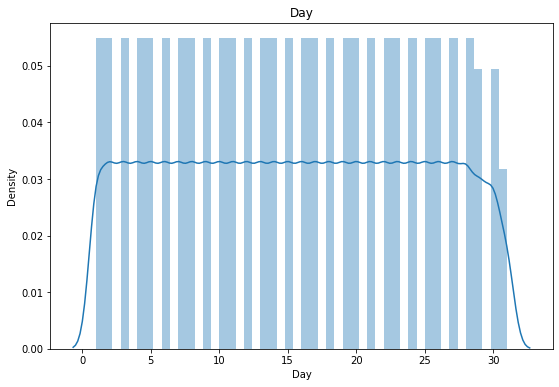

In [ ]:
#printing displots to analyze the distribution of all numerical features
# plot a bar plot for each numerical feature count (except store(which is just an id ))
#gca - get current axis . 
for col in numeric_feat[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    sns.distplot(feature,ax = ax)    
    ax.set_title(col)
plt.show()

In the above charts we see that many features has catogorical value so its more look like skewed chart and rest of the feature are also not normally distributed. So by using log1p transformation we are able to make our distribution more closer to look like normal distribution  and less skewed.


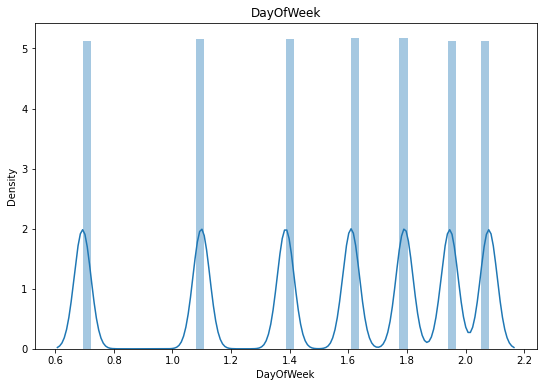

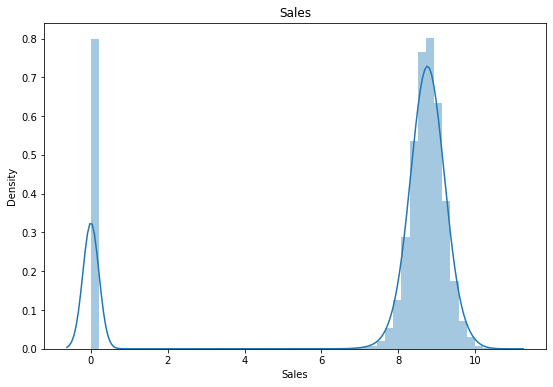

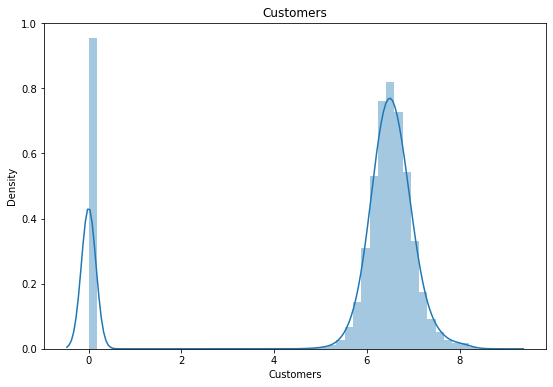

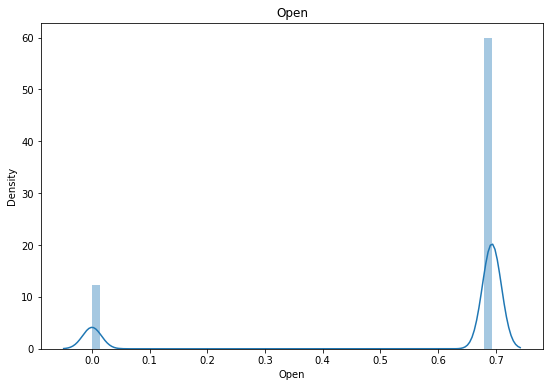

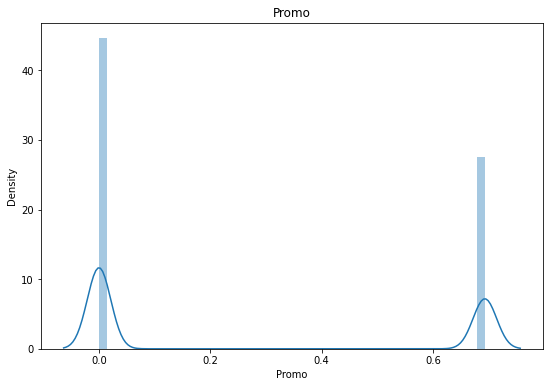

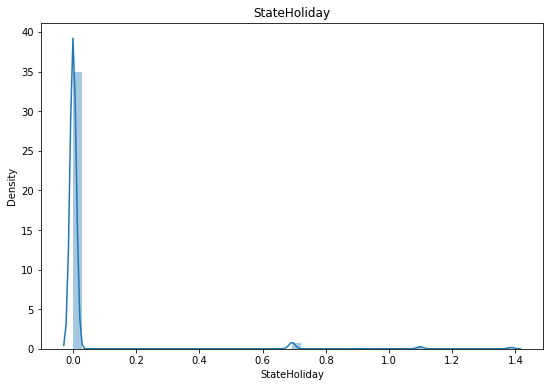

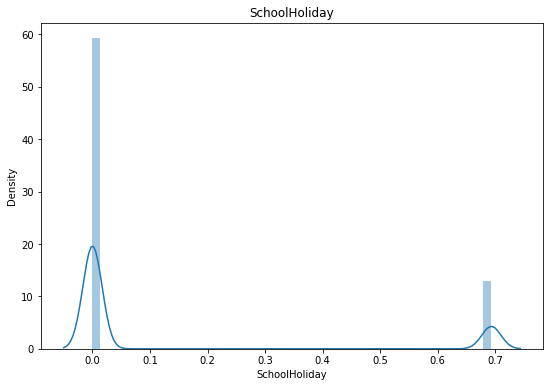

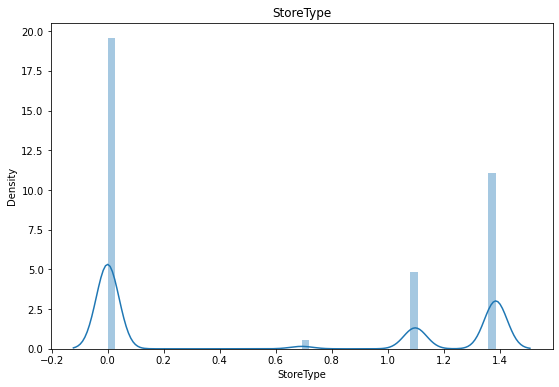

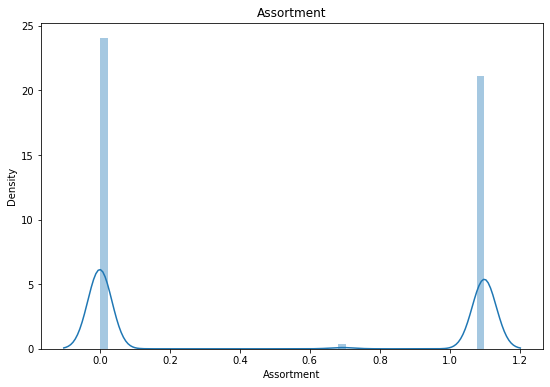

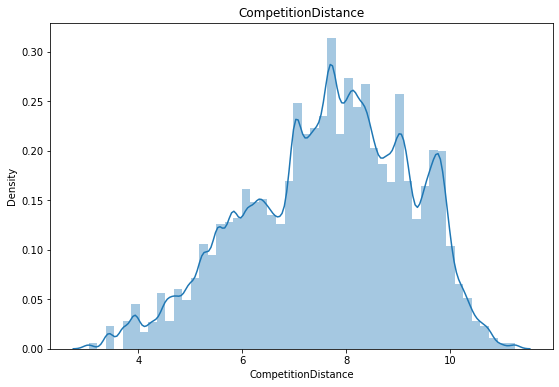

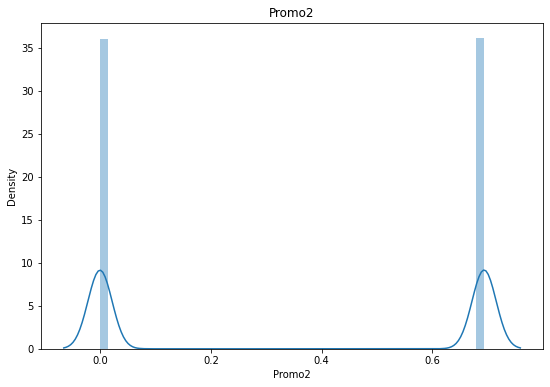

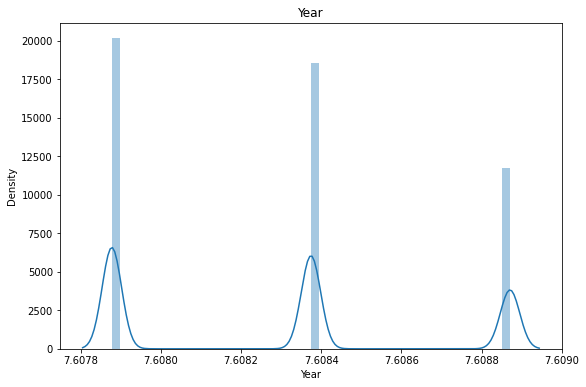

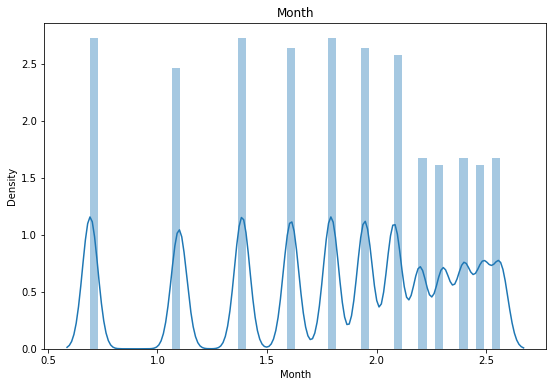

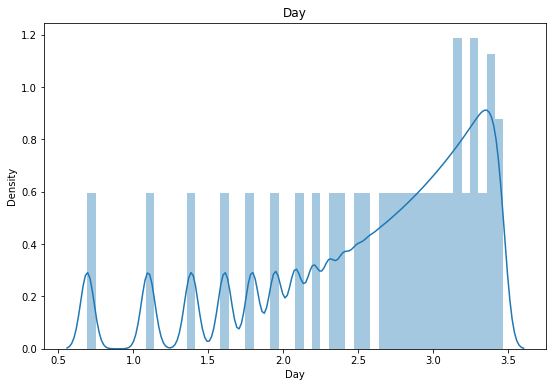

In [ ]:
for col in numeric_feat[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log1p(final_df[col])
    sns.distplot(feature)    
    ax.set_title(col)    
    
plt.show()

Now, we can see that some of our features like CompititionDistance now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacAuse of some features have catagorical values like 1,0.

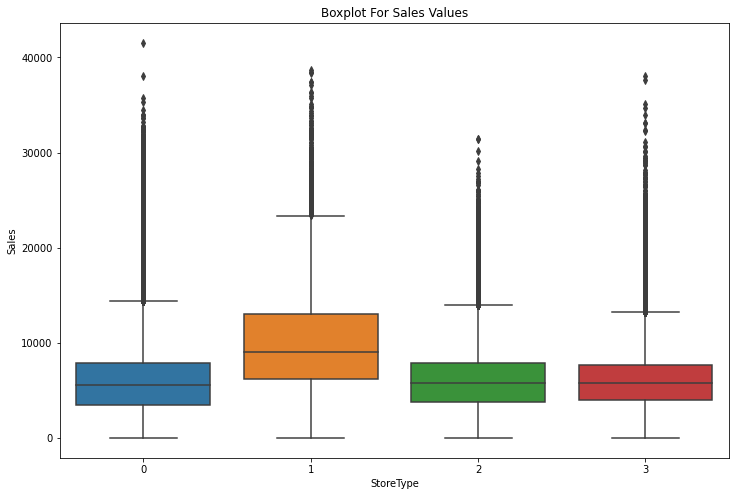

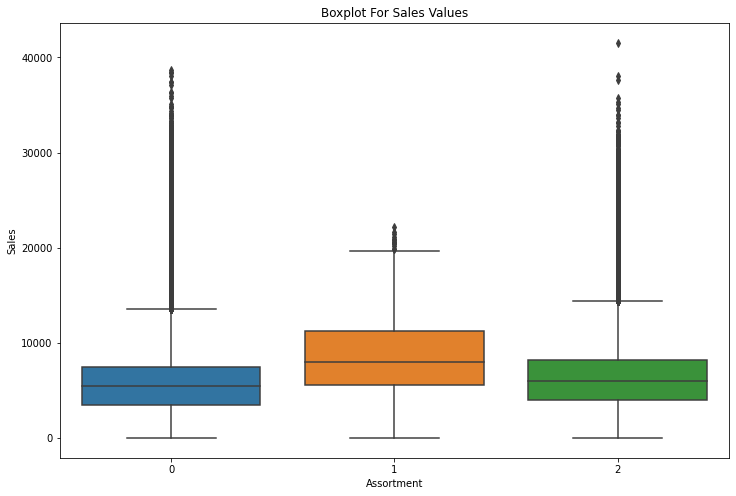

In [ ]:
for col in ['StoreType','Assortment']:
  plt.figure(figsize=(12, 8))
  plot_storetype_sales = sns.boxplot(x=col, y="Sales", data=final_df)
  plt.title('Boxplot For Sales Values')
plt.show()

In this above boxplot we see too many outliers. if we look at the data and apply some domain knowledge Then it says that these values are not outliers.
For Example :-
if a store start giving discount on some products which means number of sales increase due to some discount. so when we compline our data and plot and box plot on a yearly based data so some of our value shown as outliers.beacuse in some month or an specific occasions store giving some discount.

Also now we and checked and removed skewness of some feature like competion distance and also have checked outliers now we are clear to go ahead and apply feature engineering

## Feature Engineering

Checking the correlation of each feature with our dependend feature 'Sales'

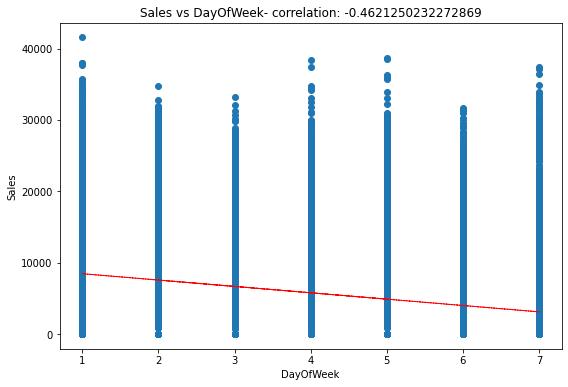

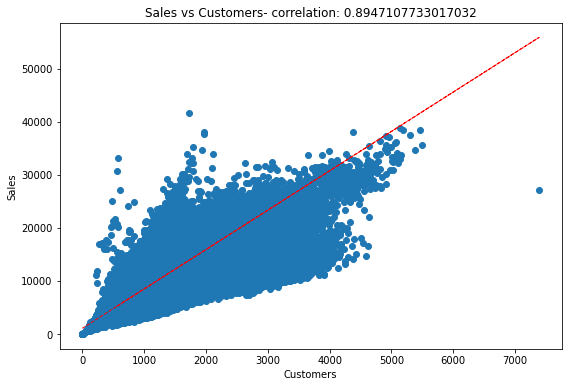

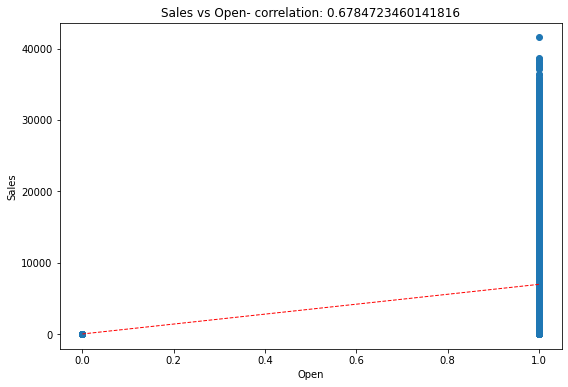

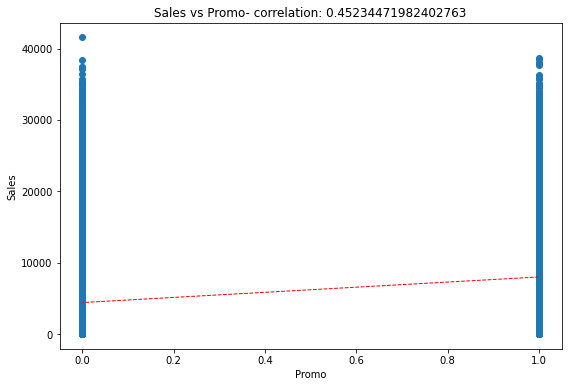

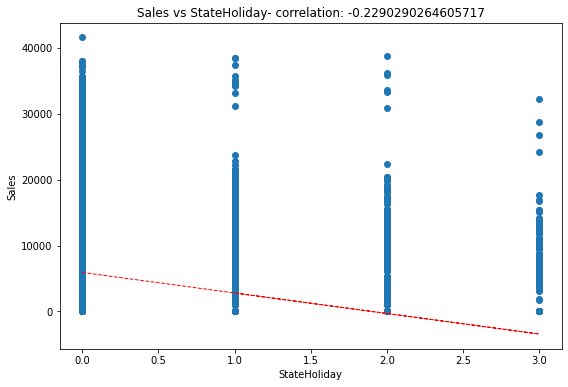

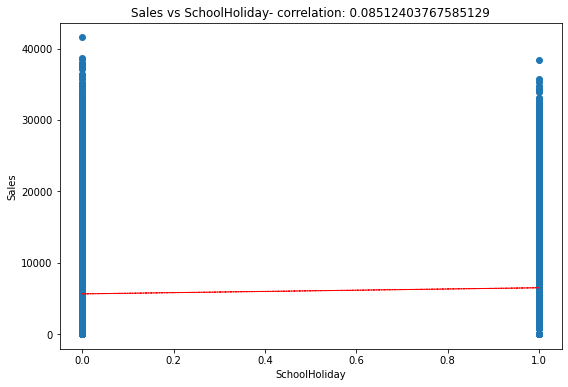

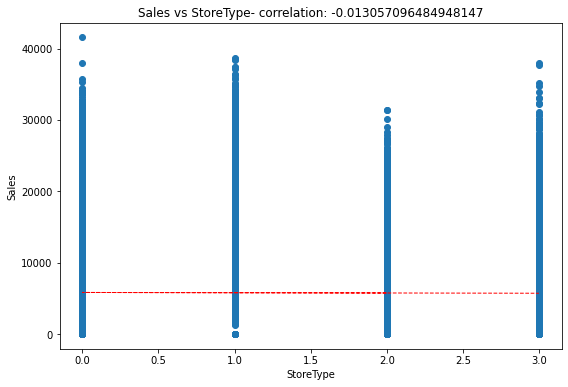

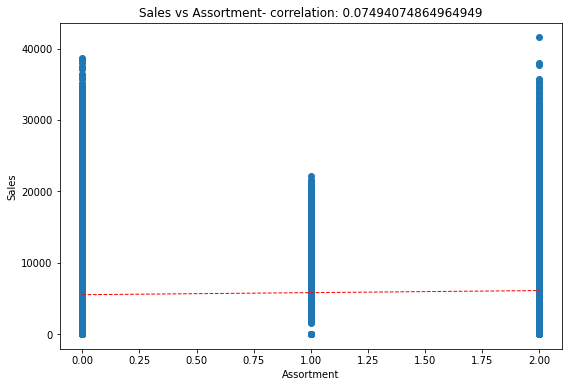

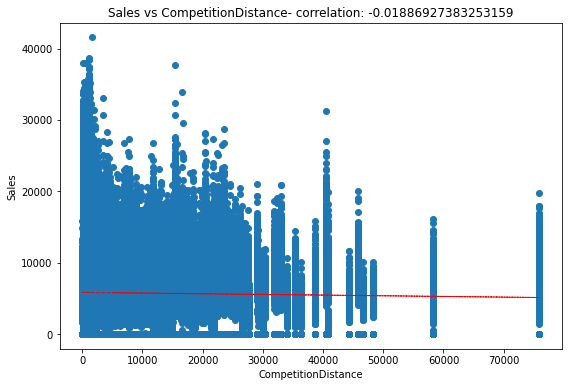

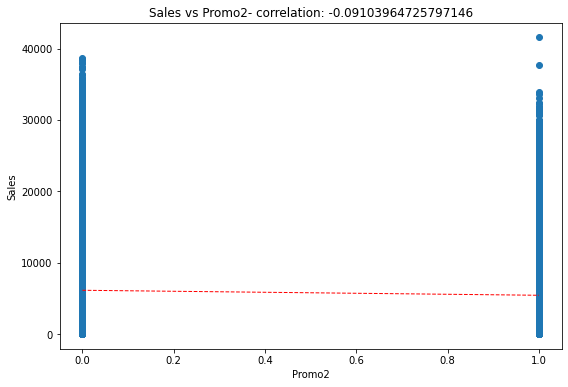

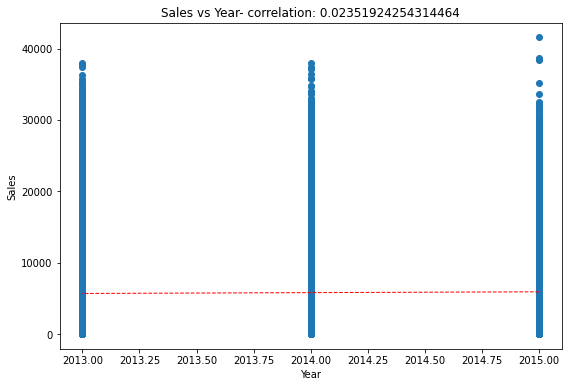

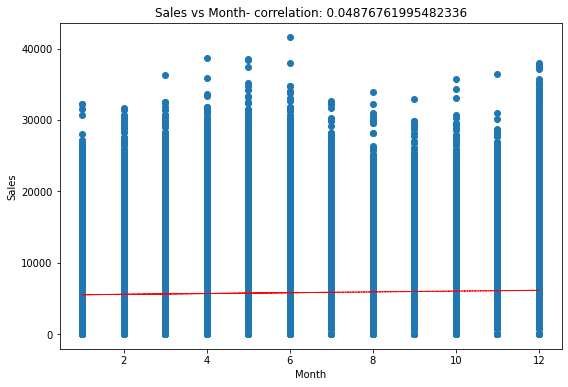

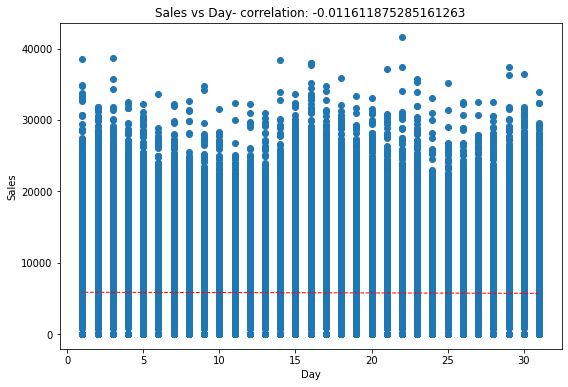

In [ ]:
#correlation is the corr shows between both independent and dependent variable.
# " Now this z and y_hat is the code used to create the red line in the scatter plot which is the best fit line
# z is showing the polynomial fit for numpy array like this is showing 1-d array.
# The line of best fit estimates a straight line that minimizes the distance between itself and where observations fall in some data set. 
# The line of best fit is used to show a trend or correlation between the dependent variable and independent variable(s).
# Also shows us it is positive or negative correlation.

for col in numeric_feat:
  if col not in ['Store','Date','Sales']:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final_df[col]
    label = final_df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final_df[col], final_df['Sales'], 1)
    y_hat = np.poly1d(z)(final_df[col])

    plt.plot(final_df[col], y_hat, "r--", lw=1)

    

plt.show()

SO , From this all charts we can clearly see that the customer is highly correlated (0.89) with our targeted variales that is sales .

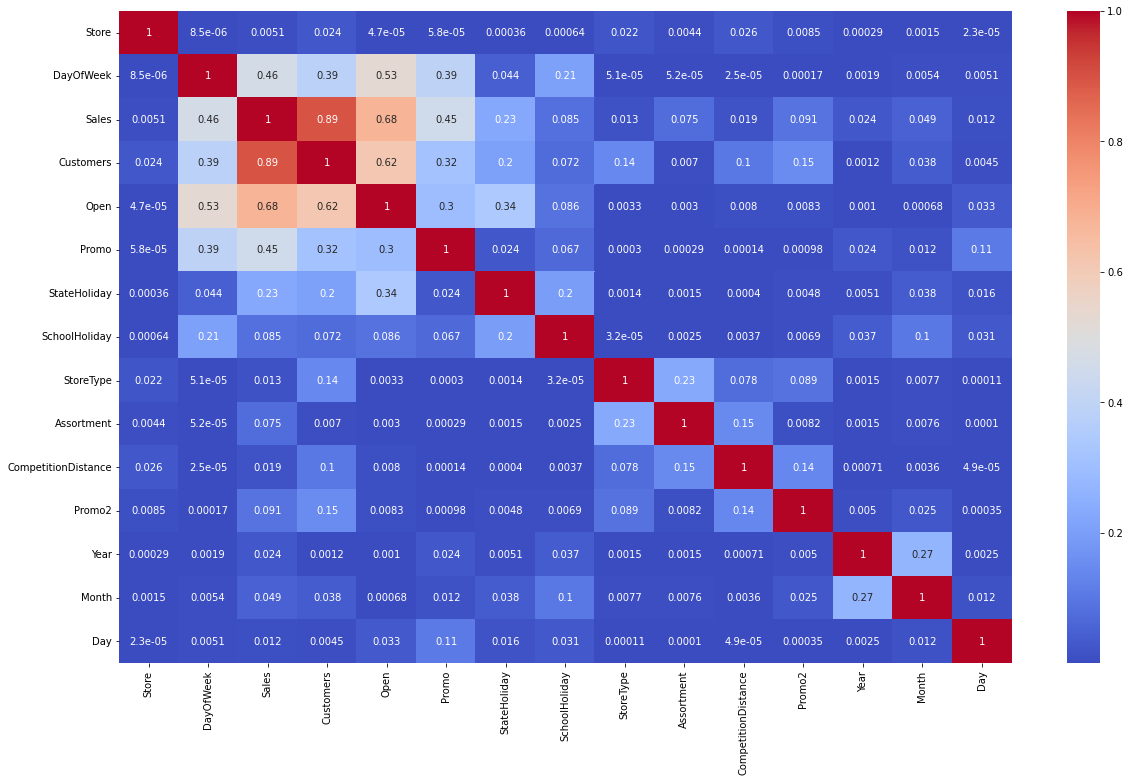

In [ ]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Selecting feature 

As we observE our dataset in which we have feature name called 'Open' which simply tells us weather a store open or close. So sales only generated when store is open. So we have to eleminate those rows/ observation in which store is closs or its value = 0. 

In [ ]:
final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].count()[0]

172817

In [ ]:
final_df = final_df.drop(final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].index)

In [ ]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,0,2015,7,31


Then we have only data of store which is open. so we also drop that columns because all the observation values are same as '1'.

In [ ]:
final_df = final_df.drop(['Open'], axis=1 )

In [ ]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,2,0,1270,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,0,0,570,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,0,0,14130,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,2,2,620,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,0,0,29910,0,2015,7,31


## Multicollinearity

In [ ]:
# Checking multicollinearity with the vif function.
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales']]])

,variables,VIF
0,DayOfWeek,5.768386
1,Customers,5.394063
2,Promo,2.064447
3,StateHoliday,1.004268
4,SchoolHoliday,1.285032
5,StoreType,1.970759
6,Assortment,2.047135
7,CompetitionDistance,1.613103
8,Promo2,2.160854
9,Year,23.790907


The Multicollinearity of 'Year' is very high so we decided to drop these column for our linear Regression model.

Because the the multicollinearity of each independeble feature should be under 10.

In [ ]:
#Checking multicollinearity 
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Store','Sales','Year']]])

,variables,VIF
0,DayOfWeek,4.045805
1,Customers,4.105804
2,Promo,1.893358
3,StateHoliday,1.003949
4,SchoolHoliday,1.270903
5,StoreType,1.886211
6,Assortment,2.029036
7,CompetitionDistance,1.531142
8,Promo2,1.936814
9,Month,3.680958


Now it seems ok . all are under 10 .

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final_df.columns.drop(['Store','Sales','Date'])

Creating x , y variable data for fit machine learning Model.

In [ ]:
# Create the data of independent variables
X = final_df[indep_var].values

# Create the dependent variable data
y = final_df[dep_var].values

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
# Transforming data( This is  done so that all values are between 0 and 1 .)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementing Machine Learning

Now Lets implement 3 models on our dataset:

1.Linear Regression.

  -Lasso

  -Ridge

  -Elastic Net

2.Decision Tree

3.Random Forrest

  -Random Forrest with Optimization

4.XGBoost

  -XGBoost with Optimization.

#We will be using search algorithms/Optimization for each :

1.  GridSearchCV
3.  BayesianSearchCV

to Get the best parameters to use in this ml models.

We will be using following Matrics to check our model performance :
1.   Mean Absolute Error (MAE)
2.   Root Mean Square Error (MSE)
3.   Mean Square Error (MSE)
4.   R Squared (R2)
5.   Adjusted R Squared


## Defining a function for model analyse.

In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)

  # Calculating Evaluation Matrix
  mse_train = mean_squared_error(y_train,y_pred_train)
  mse_test = mean_squared_error(y_test,y_pred_test)
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)
  r2_score_train = r2_score(y_train,y_pred_train)
  r2_score_test=r2_score(y_test,y_pred_test)
  try:
    importance = model.feature_importances_
    feature = feature
  except:
    importance = np.abs(model.coef_)
    feature = indep_var
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE of train dataset:" , mse_train)
  print("MSE of test dataset:" , mse_test)
  print("RMSE of train dataset :" ,rmse_train)
  print("RMSE of test dataset :" ,rmse_test)
  print("MAE of train dataset:" ,mean_absolute_error(y_train,y_pred_train))
  print("MAE of test dataset:" ,mean_absolute_error(y_test,y_pred_test))
  print("Train R2 :", r2_score_train)
  print("Test R2 :" ,r2_score_test)
  print("Adjusted R2 : train dataset", 1-(1-r2_score_train)*((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
  print("Adjusted R2 of test dataset: ", 1-(1-r2_score_test)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,9))
  plt.subplot(3,1,1)
  plt.plot((y_pred_test)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted sales')
  plt.subplot(3,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.subplot(3,1,3)
  plt.scatter((y_pred_test),(y_test),c= 'purple')
  plt.title('Hetroscadacity')
  plt.tight_layout()
  plt.show()

  return model

## **Linear Regression**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
reg = LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

Checking the score.

In [ ]:
#check the coefficeint
reg.coef_

array([-117.79399984, 2552.21623998,  639.02587921,  -63.06893135,
         15.59218662,  374.3200123 ,  196.61422916,  228.52173013,
        120.52815429,  136.35286538,  132.21899225,    9.9408451 ])

In [ ]:
#check the intercept
reg.intercept_

6956.389915516053

Analyzing linear reagression by defined function and also plotting importance chart.

MSE of train dataset: 2290986.920415814
MSE of test dataset: 2304756.7312215073
RMSE of train dataset : 1513.6006476002228
RMSE of test dataset : 1518.1425266494273
MAE of train dataset: 1046.7657005921235
MAE of test dataset: 1048.3104082488692
Train R2 : 0.761969449337875
Test R2 : 0.7619454153168113
Adjusted R2 : train dataset 0.7619652208158796
Adjusted R2 of test dataset:  0.7619284986194523


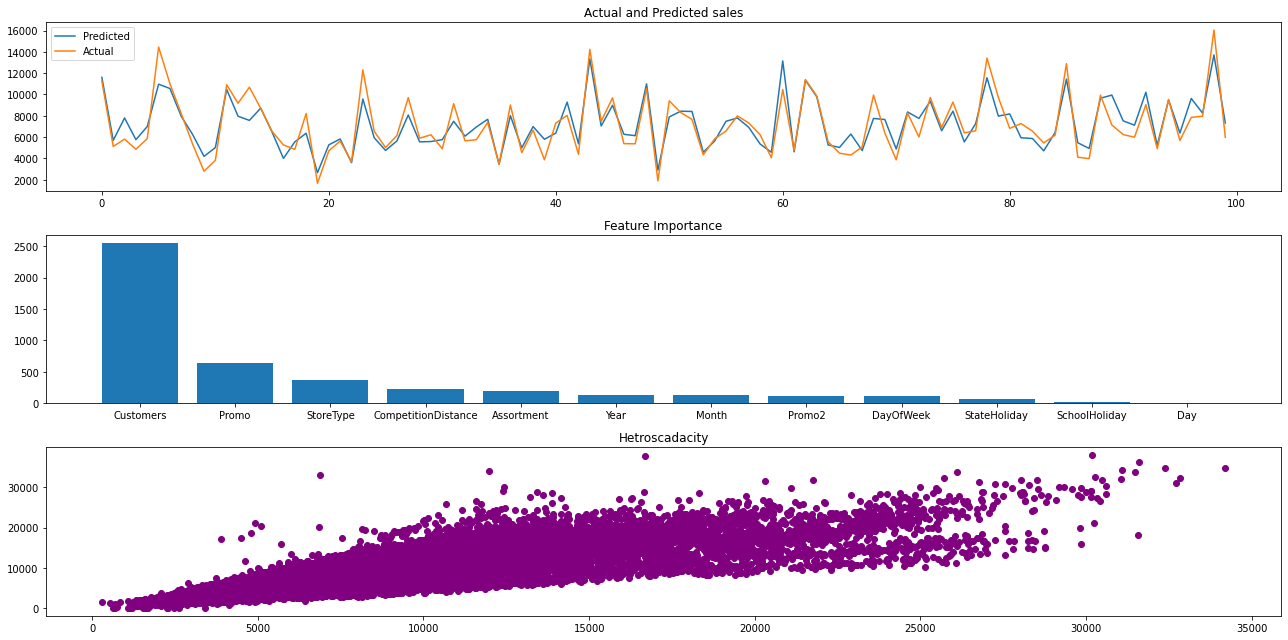

LinearRegression()

In [ ]:
analyse_model(reg, X_train , X_test , y_train, y_test)

Looks like our r2 score value is 0.76 that means our model is able to capture most of the data variance. so it is a good model and giving importance to the feature of customers most and also not showing high hetroscadacity now lets check it with orther models.

## LASSO REGRESSION

In [ ]:
# Create an IMPORT of Lasso Regression implementation
from sklearn.linear_model import Lasso

MSE of train dataset: 2290986.9204159384
MSE of test dataset: 2304756.7291156813
RMSE of train dataset : 1513.600647600264
RMSE of test dataset : 1518.142525955874
MAE of train dataset: 1046.7657025783355
MAE of test dataset: 1048.3104103942562
Train R2 : 0.761969449337862
Test R2 : 0.7619454155343186
Adjusted R2 : train dataset 0.7619652208158666
Adjusted R2 of test dataset:  0.7619284988369752


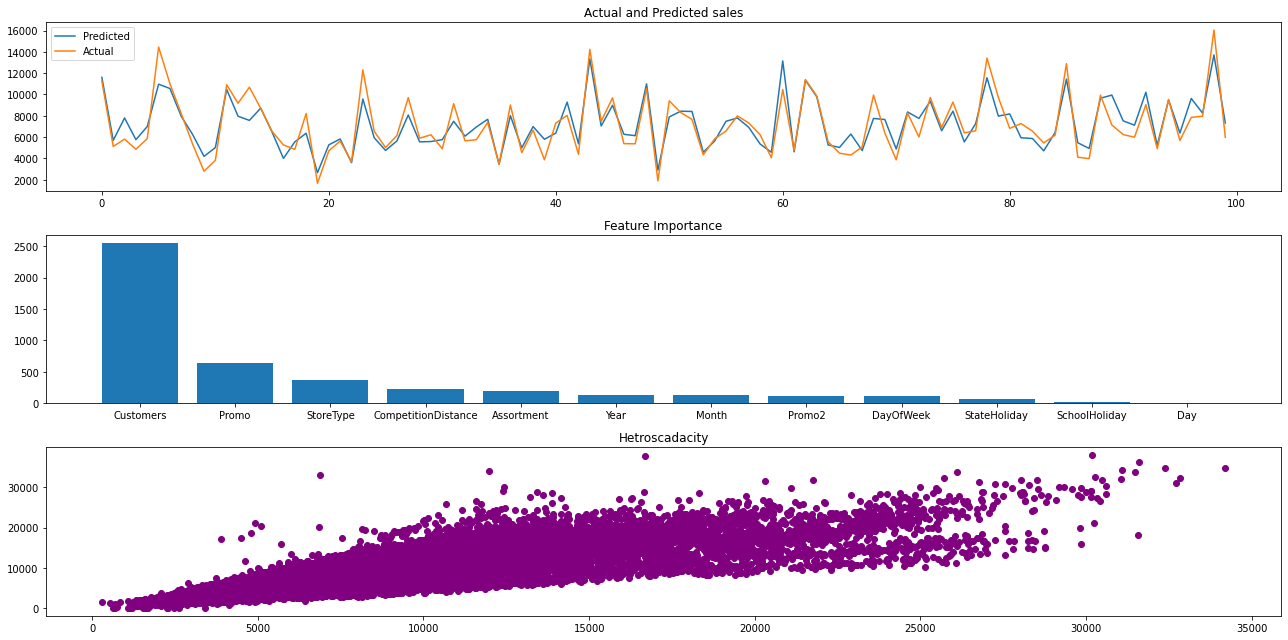

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
# fitting lasso regressor
lasso = Lasso(alpha=0.0001, max_iter=3000)
analyse_model(lasso , X_train , X_test , y_train, y_test)

Looks like our r2 score value and adjusted r2  is around 0.76 that means our model is able to capture most of the data variance. so it is a good model and giving importance to the feature of customers most and also not showing high hetroscadacity now lets check it with orther cross validation by grid search and do ot with best parameters ( alpha value ).

In [ ]:
#Lasso with Cross validation.

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -2291151.788205067


In [ ]:
lasso_bestpara = Lasso(alpha = 1e-10 , max_iter=3000)

MSE of train dataset: 2290986.920415814
MSE of test dataset: 2304756.731221505
RMSE of train dataset : 1513.6006476002228
RMSE of test dataset : 1518.1425266494266
MAE of train dataset: 1046.7657005921262
MAE of test dataset: 1048.3104082488721
Train R2 : 0.761969449337875
Test R2 : 0.7619454153168115
Adjusted R2 : train dataset 0.7619652208158796
Adjusted R2 of test dataset:  0.7619284986194526


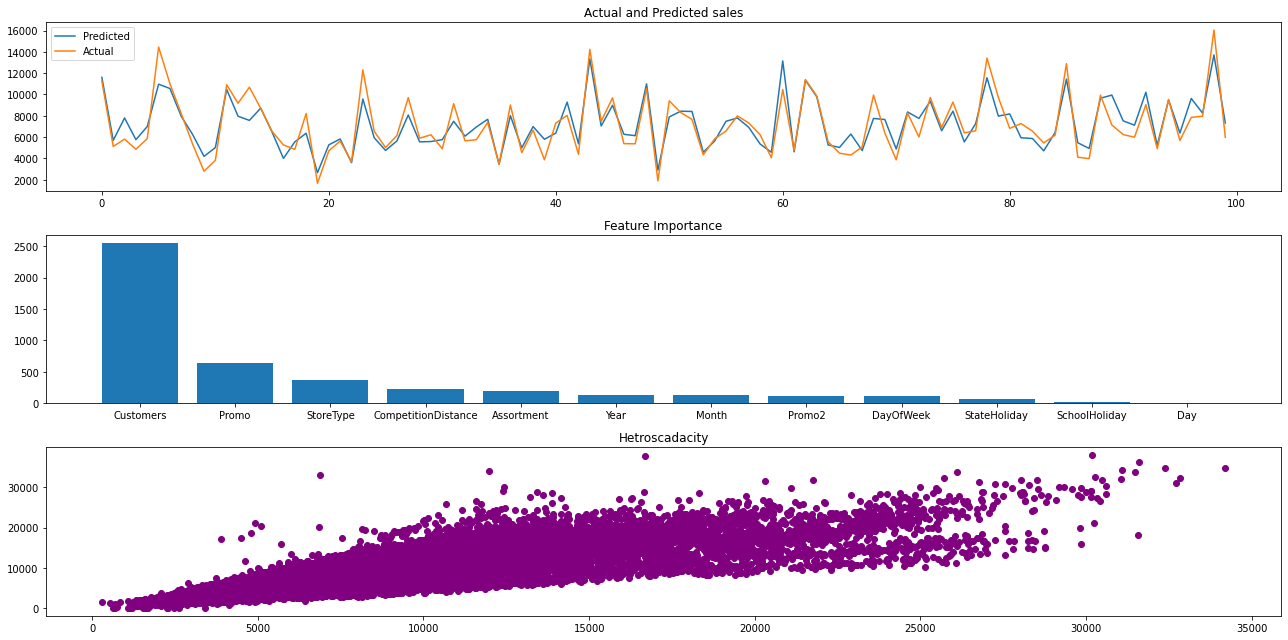

Lasso(alpha=1e-10, max_iter=3000)

In [ ]:
analyse_model(lasso_bestpara , X_train , X_test , y_train, y_test)

so , as it is seen even after the cross validation it doesnot create much difference so lets check with ridge .

## Ridge Regression

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.0001)

MSE of train dataset: 2290986.9204158126
MSE of test dataset: 2304756.7312183464
RMSE of train dataset : 1513.6006476002224
RMSE of test dataset : 1518.1425266483864
MAE of train dataset: 1046.7657006348834
MAE of test dataset: 1048.3104082918214
Train R2 : 0.761969449337875
Test R2 : 0.7619454153171377
Adjusted R2 : train dataset 0.7619652208158796
Adjusted R2 of test dataset:  0.7619284986197788


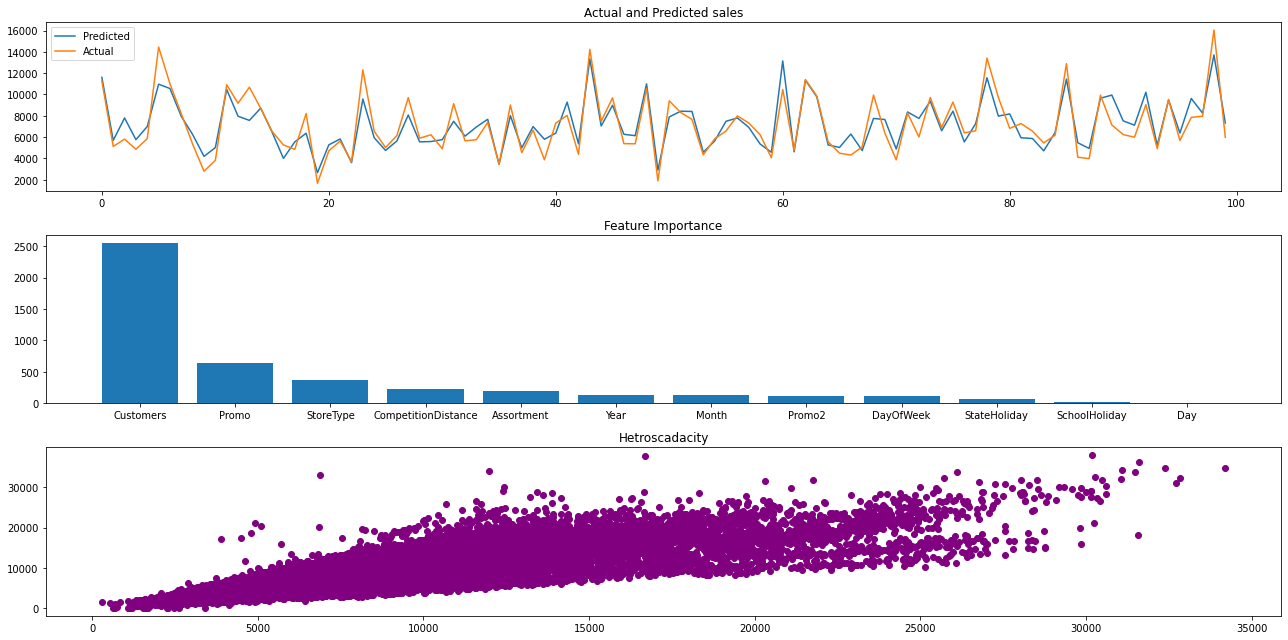

Ridge(alpha=0.0001)

In [ ]:
analyse_model(ridge  , X_train , X_test , y_train, y_test)

In [ ]:
# Ridge with cross validation.

In [ ]:
### Cross validation
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

MSE of train dataset: 2290986.9222327126
MSE of test dataset: 2304756.4169280827
RMSE of train dataset : 1513.6006482004138
RMSE of test dataset : 1518.1424231369344
MAE of train dataset: 1046.7699773460713
MAE of test dataset: 1048.3147039693426
Train R2 : 0.7619694491491016
Test R2 : 0.7619454477796693
Adjusted R2 : train dataset 0.7619652206271028
Adjusted R2 of test dataset:  0.7619285310846173


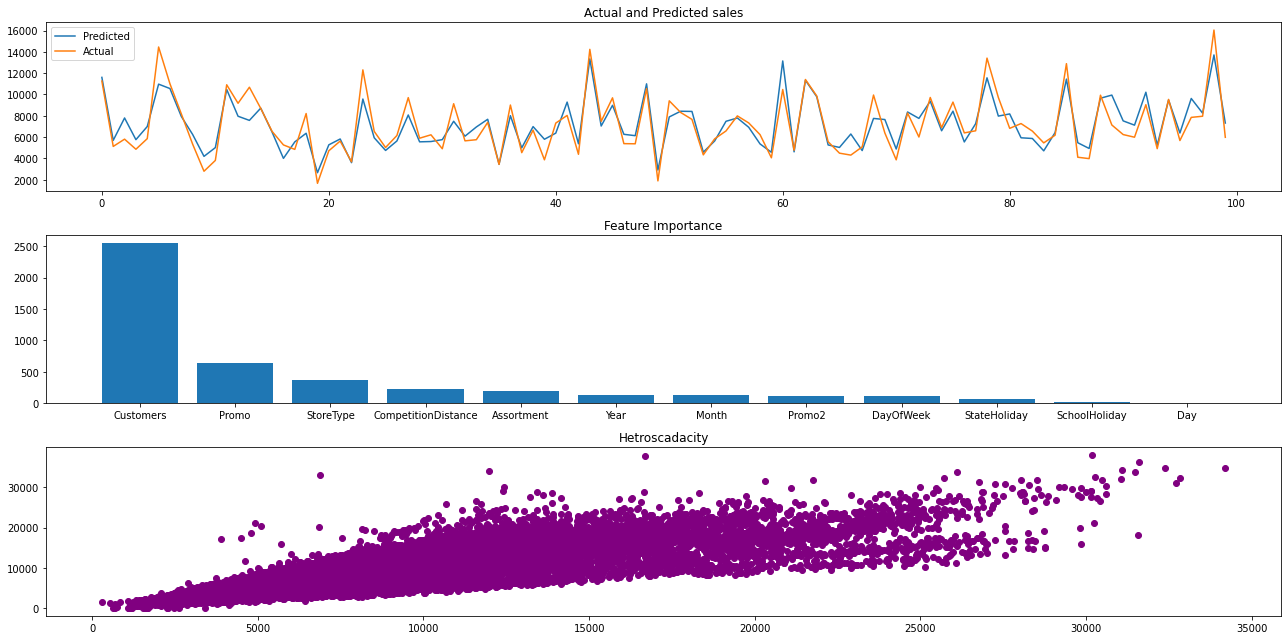

Ridge(alpha=10)

In [ ]:
analyse_model(ridge_regressor.best_estimator_, X_train , X_test , y_train, y_test)

so , as it seems not much difference with cross validation lets move forward with different ml model.

# ELASTIC - NET REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.0001)

MSE of train dataset: 2290986.9411690165
MSE of test dataset: 2304755.683378735
RMSE of train dataset : 1513.6006544557968
RMSE of test dataset : 1518.1421815425376
MAE of train dataset: 1046.7801510914458
MAE of test dataset: 1048.3249187696813
Train R2 : 0.7619694471816443
Test R2 : 0.7619455235467917
Adjusted R2 : train dataset 0.7619652186596105
Adjusted R2 of test dataset:  0.7619286068571238


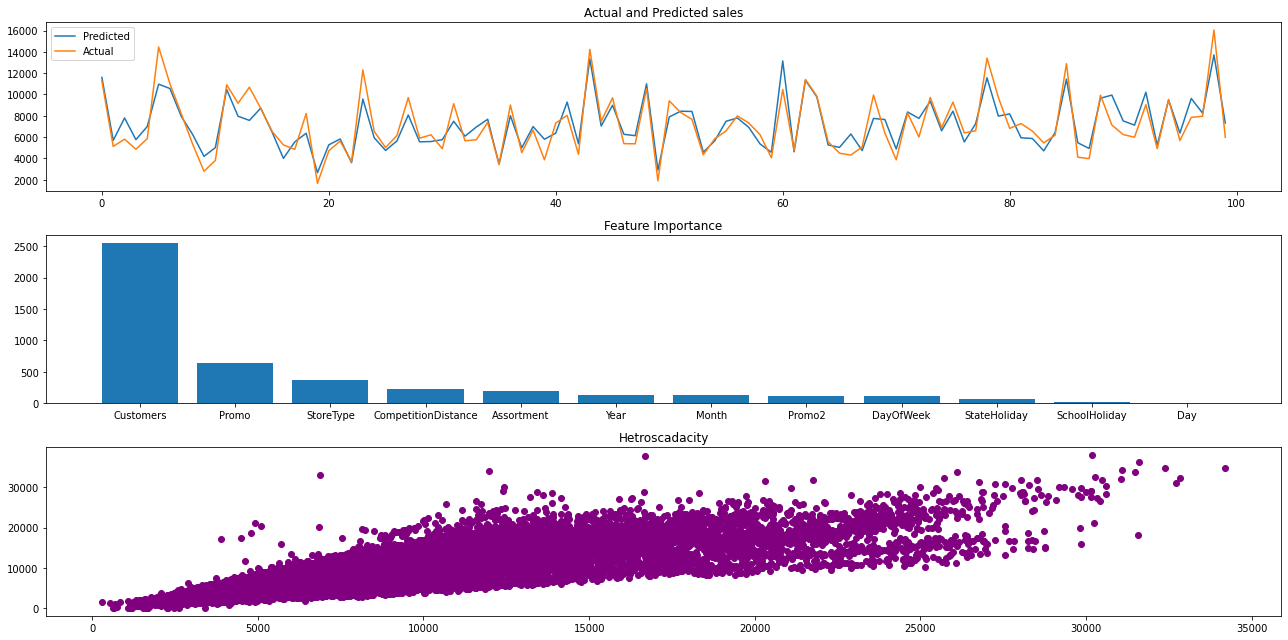

ElasticNet(alpha=0.0001)

In [ ]:
analyse_model(elasticnet , X_train , X_test , y_train, y_test)

Looks like our r2 score value and adjusted r2  is around 0.76 that means our model is able to capture most of the data variance. so it is a good model and giving importance to the feature of customers most and also not showing high hetroscadacity now lets check it with orther cross validation by grid search and do ot with best parameters ( alpha value ).

In [ ]:
# Elastic net with cross validation.

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-10,1e-5,1e-3,1e-1,1,5,10,30,60,100]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 30, 60,
                                   100]},
             scoring='neg_mean_squared_error')

MSE of train dataset: 2290986.9206233686
MSE of test dataset: 2304756.6245507426
RMSE of train dataset : 1513.600647668786
RMSE of test dataset : 1518.1424915174275
MAE of train dataset: 1046.7671451413416
MAE of test dataset: 1048.3118592372343
Train R2 : 0.7619694493163103
Test R2 : 0.7619454263346614
Adjusted R2 : train dataset 0.7619652207943144
Adjusted R2 of test dataset:  0.7619285096380856


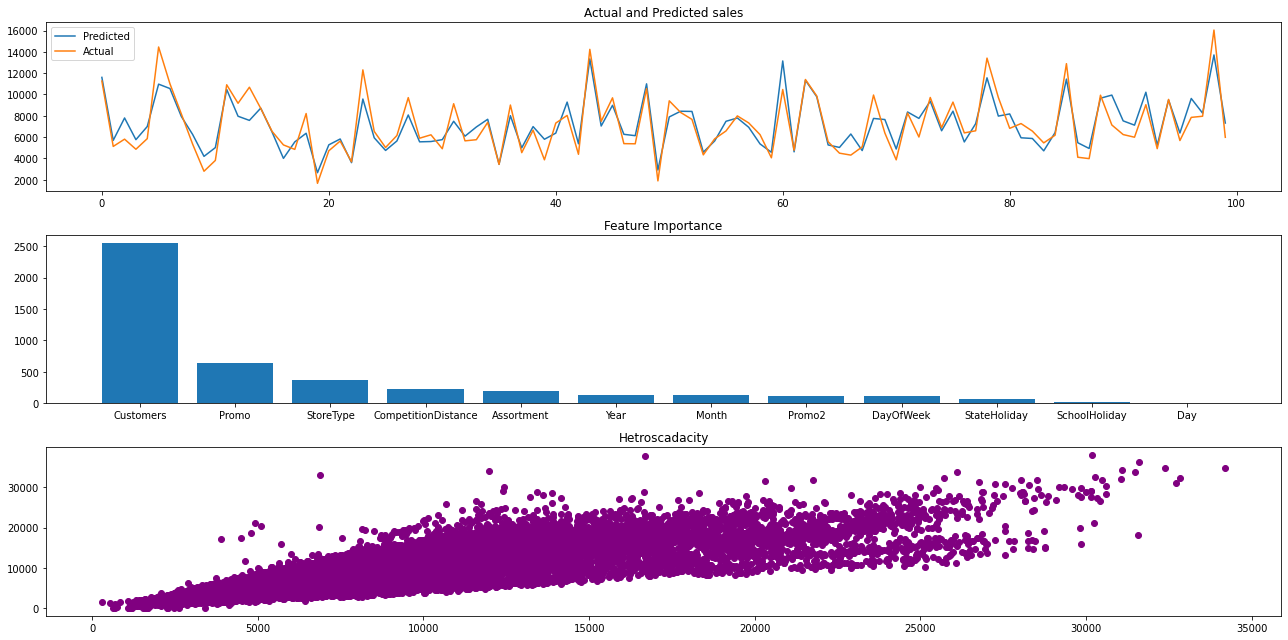

ElasticNet(alpha=1e-05)

In [ ]:
analyse_model( elastic_regressor.best_estimator_ , X_train , X_test , y_train, y_test)

#DECISION TREE

This model said to be one of the best model as it doesnt care much about multicollinearity so , lets check the result .


In [ ]:
#import the packages
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=10, max_leaf_nodes=100,random_state=1)
decision_tree

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
                      max_leaf_nodes=100, random_state=1)

as decision tree doesnot have feature of .coef we have to remve it thats why again the fn is wriiten as analyse_decision

In [ ]:
# Defining a function to train the input model and print evaluation matrix
def analyse_decision (model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)

  # Calculating Evaluation Matrix
  mse_train = mean_squared_error(y_train,y_pred_train)
  mse_test = mean_squared_error(y_test,y_pred_test)
  rmse_train = np.sqrt(mse_train)
  rmse_test = np.sqrt(mse_test)
  r2_score_train = r2_score(y_train,y_pred_train)
  r2_score_test=r2_score(y_test,y_pred_test)
  try:
    importance = model.feature_importances_
    feature = feature
  except:
    feature = indep_var
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE of train dataset:" , mse_train)
  print("MSE of test dataset:" , mse_test)
  print("RMSE of train dataset :" ,rmse_train)
  print("RMSE of test dataset :" ,rmse_test)
  print("MAE of train dataset:" ,mean_absolute_error(y_train,y_pred_train))
  print("MAE of test dataset:" ,mean_absolute_error(y_test,y_pred_test))
  print("Train R2 :", r2_score_train)
  print("Test R2 :" ,r2_score_test)
  print("Adjusted R2 : train dataset", 1-(1-r2_score_train)*((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
  print("Adjusted R2 of test dataset: ", 1-(1-r2_score_test)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,9))
  plt.subplot(3,1,1)
  plt.plot((y_pred_test)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted sales')
  plt.subplot(3,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.subplot(3,1,3)
  plt.scatter((y_pred_test),(y_test),c= 'purple')
  plt.title('Hetroscadacity')
  plt.tight_layout()
  plt.show()

  return model

MSE of train dataset: 1547679.824929238
MSE of test dataset: 1561725.0240394967
RMSE of train dataset : 1244.057806104378
RMSE of test dataset : 1249.689971168648
MAE of train dataset: 907.4912300008715
MAE of test dataset: 908.6425667751661
Train R2 : 0.839198086338396
Test R2 : 0.8386919552285996
Adjusted R2 : train dataset 0.8391952297536973
Adjusted R2 of test dataset:  0.8386804923139972


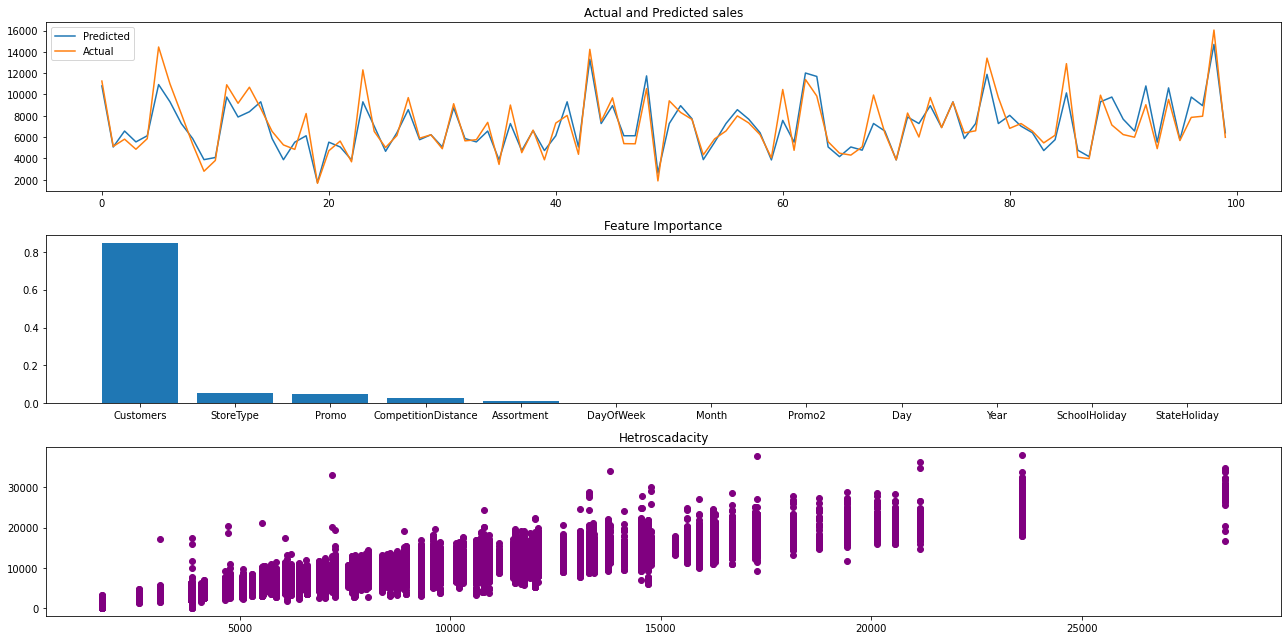

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
                      max_leaf_nodes=100, random_state=1)

In [ ]:
analyse_decision( decision_tree , X_train , X_test , y_train, y_test)

Looks like our r2 score value is 0.83 that means our model is able to capture most of the data variance. and its seems like good fit to model even the error has been reduced.

# RANDOM FOREST

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, criterion='squared_error',random_state=1)

MSE of train dataset: 46652.97111825779
MSE of test dataset: 315640.9403535632
RMSE of train dataset : 215.99298858587468
RMSE of test dataset : 561.81931290546
MAE of train dataset: 140.02035214231896
MAE of test dataset: 368.35857426139705
Train R2 : 0.9951528171957928
Test R2 : 0.9673979592088858
Adjusted R2 : train dataset 0.9951527310874381
Adjusted R2 of test dataset:  0.9673956424341088


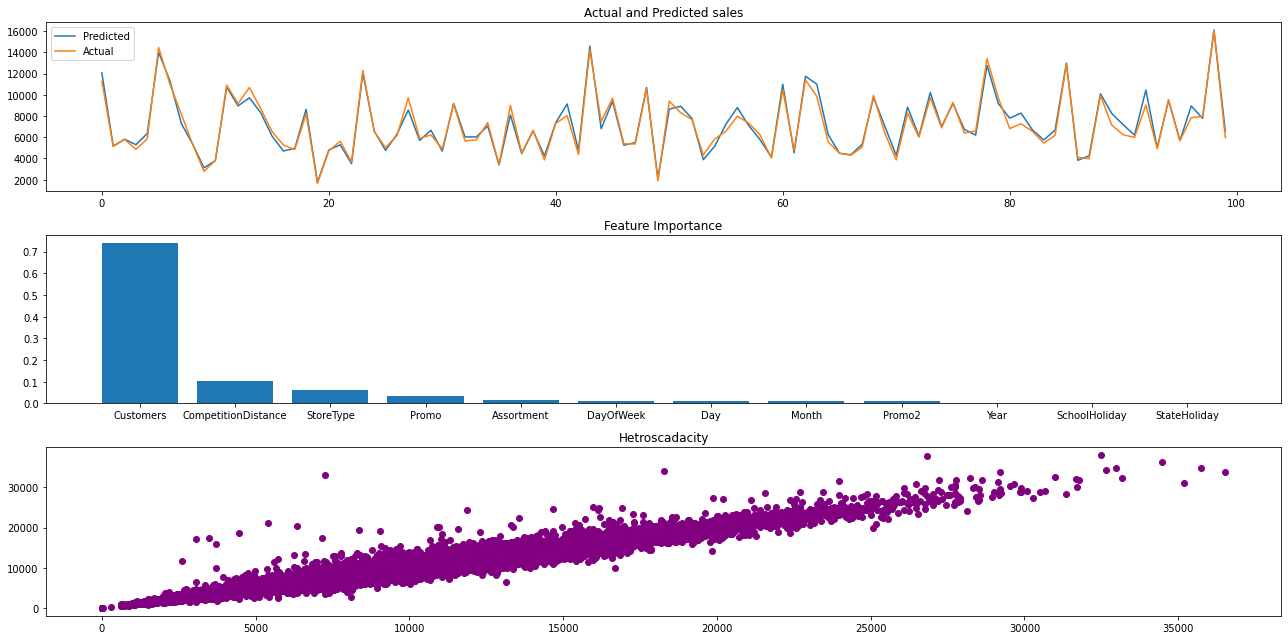

RandomForestRegressor(n_estimators=50, random_state=1)

In [ ]:
analyse_decision( rf_model , X_train , X_test , y_train, y_test)

# XGBOOST

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=50, criterion='squared_error',random_state=1)

[21:55:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE of train dataset: 1386635.0699187652
MSE of test dataset: 1394660.3850771994
RMSE of train dataset : 1177.5546993319526
RMSE of test dataset : 1180.9574018893313
MAE of train dataset: 848.0683286469427
MAE of test dataset: 848.0143741217362
Train R2 : 0.8559304261762124
Test R2 : 0.8559477908248962
Adjusted R2 : train dataset 0.8559278668351527
Adjusted R2 of test dataset:  0.8559375541490106


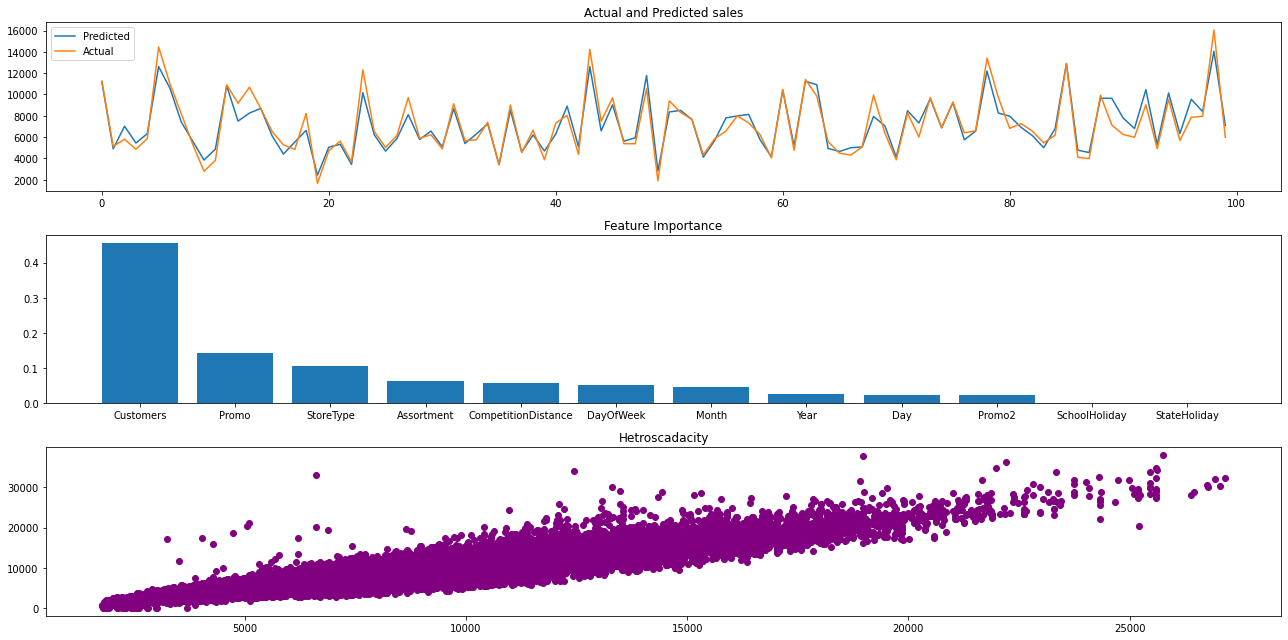

XGBRegressor(criterion='squared_error', n_estimators=50, random_state=1)

In [ ]:
analyse_decision( xgb , X_train , X_test , y_train, y_test)

# GRADIENT BOOSTING

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=1)

MSE of train dataset: 1152056.7309630127
MSE of test dataset: 1158764.14286249
RMSE of train dataset : 1073.3390568515676
RMSE of test dataset : 1076.4590762599803
MAE of train dataset: 785.4098085345371
MAE of test dataset: 785.0256547862409
Train R2 : 0.8803028094043585
Test R2 : 0.8803131310831652
Adjusted R2 : train dataset 0.880300683029396
Adjusted R2 of test dataset:  0.8803046258634821


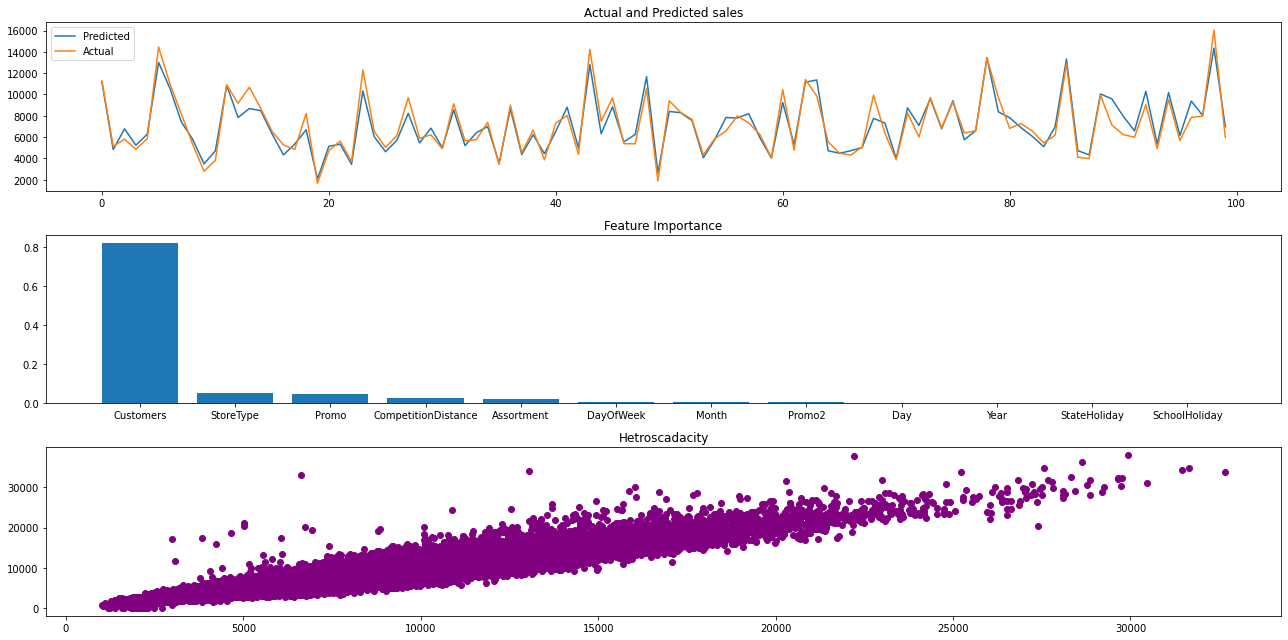

GradientBoostingRegressor(random_state=1)

In [ ]:
analyse_decision( gb_model , X_train , X_test , y_train, y_test)

In [ ]:
#Now we can try to do gradiest boosting with Hyperparameter tunning.
#Provide the range of values for chosen hyperparameters
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 2, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  40.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  39.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time= 1.1min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time= 1.1min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.6min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 1.5min
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=  54.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=  51.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=80; total time= 1.3min
[CV] END max_depth=4, mi

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

MSE of train dataset: 483298.98300774593
MSE of test dataset: 500709.62875631044
RMSE of train dataset : 695.1970821340851
RMSE of test dataset : 707.6083865785583
MAE of train dataset: 510.21735960093224
MAE of test dataset: 515.3958049003535
Train R2 : 0.9497858665038127
Test R2 : 0.9482825145466507
Adjusted R2 : train dataset 0.9497849744688727
Adjusted R2 of test dataset:  0.9482788393851295


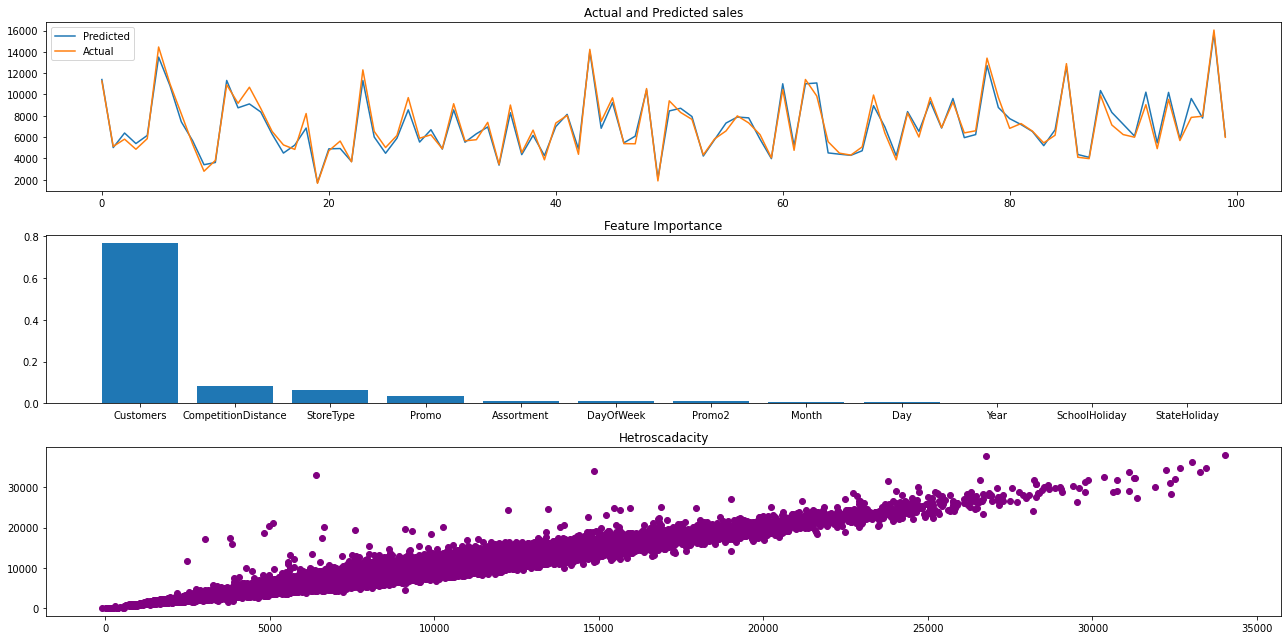

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [ ]:
analyse_decision( gb_grid.best_estimator_ , X_train , X_test , y_train, y_test)

SO , Even after thegrid search cv we got r2 and adjusted r2 around 0.94 which is quite good and even close to random forest.

# Conculsion

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Sales' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable using corr() Function and for multicollinearity we use VIF Function defined by us. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 8 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost and Gredient Boosting. We did hyperparameter tuning to improve our model performance.

The Important Features are 
1.  Customers
2.  Competition Distance 
3.  Store Type 
4.  Promo

we can conculed that ❗


1.  The sales in the month of December is the highest sales among others. 
2.  The Sales is highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.
3. Those Stores who takes participate in Promotion got their Sales increased.
4.  Type of Store plays an important role in opening pattern of stores. All Type ‘b’ stores never closed except for refurbishment or other reason.
5.    We can observe that most of the stores remain closed during State holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.
6. The R Squared score of all Liner Regression Algorithm with or without Regularization are quit good which is 0.76.
7.  the R Squared score of the Decision Tree Regressor model we got 0.83 on test set which is also good.
8. The Random Forest regressor model perform very well amoung the others it was around test 0.96 and train 0.99 which can be considerd as the ideal match .
9. The Gradient Boosting Regressor model perform well and give 0.88 R Squared on test set . After Applying GridSearchCV which is a optimal algorithm search tool improve our R Squared score from 0.88 to 0.94 which almost nearly the random forest regression model.
10. There is no such over fitting seen. 
11.  We can say that random forest regressor model is our optimal model and can be deploy.




We can say that random forest regressor model is our optimal model with important feature of customers , competion distance , store_type etc .

WITH VALUES OF ✅ 

MSE of train dataset: 46652.97111825779

MSE of test dataset: 315640.9403535632

RMSE of train dataset : 215.99298858587468

RMSE of test dataset : 561.81931290546

MAE of train dataset: 140.02035214231896

MAE of test dataset: 368.35857426139705

Train R2 : 0.9951528171957928

Test R2 : 0.9673979592088858

Adjusted R2 : train dataset 0.9951527310874381

Adjusted R2 of test dataset:  0.9673956424341088